Analysis

(Note medal count includes the Winter Olympics)

What I had to do is breakdown, the winners based upon country and from there of course separate it by gender. After breaking it down from there we took the original data and only kept the year and the medals won. I did print the years to their own list but I ended not needing this step, when later I setup the new Data Frame to use the index of year. Before reaching that step, I did separate the three medals into their own lists and then use that list to create the Data Frame after renaming the columns. We then create the medal counts based upon year, and medal won. For some additional cleanup we set any "NAN" to hold a zero value in its place and of course created everything as an integer, since the numbers were so well rounded and then created our line graphs.

We created some great visuals but what do they mean, well we can see with greater performance from the women in the United States that we start claiming more medals. Within some years, The United States Women's Team leads in performance for all three-medal count over the men. Showing that while there were still struggles, the success of the United States Women's Team led the world. Among two of the three countries added for comparison. We see Japan does not have much success until the later part of their women's suffrage, after World War II. China did not even come back to the Olympics until the 1984 Summer Games. Lastly, we compared it to Russia, who have been allowing women to compete for just about the same time as we have. They do have a pretty good track record of success compared to our Women's Team.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# The path to our CSV file
file = "Resources/original_olympic_data.csv"

# Read our data into pandas
df = pd.read_csv(file)
df.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
#Found Column name
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [4]:
starter_olympics_df = df.loc[:, ['Name', 'Sex', 'Age', 'Team',
                                'Year', 'Sport', 'Event', 'Medal']]
starter_olympics_df.head()


,Name,Sex,Age,Team,Year,Sport,Event,Medal
0,A Dijiang,M,24.0,China,1992,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,China,2012,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,Denmark,1920,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,1900,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,Netherlands,1988,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
medals_df = df.loc[:, ['Team','Name', 'Sex', 'Year', 'Event', 'Medal']]

In [6]:
medals_winners_df= medals_df.dropna(how='any')

In [7]:
medals_winners_df.head()

,Team,Name,Sex,Year,Event,Medal
3,Denmark/Sweden,Edgar Lindenau Aabye,M,1900,Tug-Of-War Men's Tug-Of-War,Gold
37,Finland,Arvo Ossian Aaltonen,M,1920,Swimming Men's 200 metres Breaststroke,Bronze
38,Finland,Arvo Ossian Aaltonen,M,1920,Swimming Men's 400 metres Breaststroke,Bronze
40,Finland,Juhamatti Tapio Aaltonen,M,2014,Ice Hockey Men's Ice Hockey,Bronze
41,Finland,Paavo Johannes Aaltonen,M,1948,Gymnastics Men's Individual All-Around,Bronze


In [8]:
medals_winners_df

,Team,Name,Sex,Year,Event,Medal
3,Denmark/Sweden,Edgar Lindenau Aabye,M,1900,Tug-Of-War Men's Tug-Of-War,Gold
37,Finland,Arvo Ossian Aaltonen,M,1920,Swimming Men's 200 metres Breaststroke,Bronze
38,Finland,Arvo Ossian Aaltonen,M,1920,Swimming Men's 400 metres Breaststroke,Bronze
40,Finland,Juhamatti Tapio Aaltonen,M,2014,Ice Hockey Men's Ice Hockey,Bronze
41,Finland,Paavo Johannes Aaltonen,M,1948,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...
271078,Soviet Union,Galina Ivanovna Zybina (-Fyodorova),F,1956,Athletics Women's Shot Put,Silver
271080,Soviet Union,Galina Ivanovna Zybina (-Fyodorova),F,1964,Athletics Women's Shot Put,Bronze
271082,Poland,Bogusaw Zych,M,1980,"Fencing Men's Foil, Team",Bronze
271102,Russia,Olesya Nikolayevna Zykina,F,2000,Athletics Women's 4 x 400 metres Relay,Bronze


In [9]:
USmedal_winners = medals_winners_df[(medals_winners_df["Team"] == "United States")]

In [10]:
USMale_Winner = USmedal_winners.loc[USmedal_winners["Sex"] == "M",:]
USFemale_Winner = USmedal_winners.loc[USmedal_winners["Sex"] == "F",:]

In [11]:
#USMale_Winner
#USFemale_Winner

In [12]:
USFW = USFemale_Winner[["Year", "Medal"]]


In [13]:
labels = USFW['Year'].drop_duplicates()
print(labels.tolist())

[1900, 2008, 2004, 2016, 1992, 1996, 2012, 1952, 1956, 1964, 2000, 1984, 2014, 1988, 1960, 1972, 1976, 2002, 2010, 1968, 1998, 1948, 1924, 1928, 1994, 1936, 1920, 2006, 1932, 1904, 1980]


In [14]:
USFMC = USFW.groupby(['Year','Medal']).agg(Medal_Count=pd.NamedAgg(column="Medal",aggfunc ="count"))
USMedalBRK = USFMC.reset_index()
USBREAK = USMedalBRK.set_index('Year')

In [15]:
USFWGold = USBREAK[(USBREAK["Medal"]=="Gold")]
USFEMGOLD = USFWGold.drop(columns=["Medal"])
USFEMGOLD.reset_index()
USWOMEN_GOLDEN = USFEMGOLD["Medal_Count"]

USFWSilver = USBREAK[(USBREAK["Medal"]=="Silver")]
USFEMSILVER = USFWSilver.drop(columns=["Medal"])
USFEMSILVER.reset_index()
USWOMEN_SECOND = USFEMSILVER["Medal_Count"]

USFWBronze = USBREAK[(USBREAK["Medal"]=="Bronze")]
USFEMBRONZE = USFWBronze.drop(columns=["Medal"])
USFEMBRONZE.reset_index()
USWOMEN_THIRD = USFEMBRONZE["Medal_Count"]


c:\users\bck2l\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


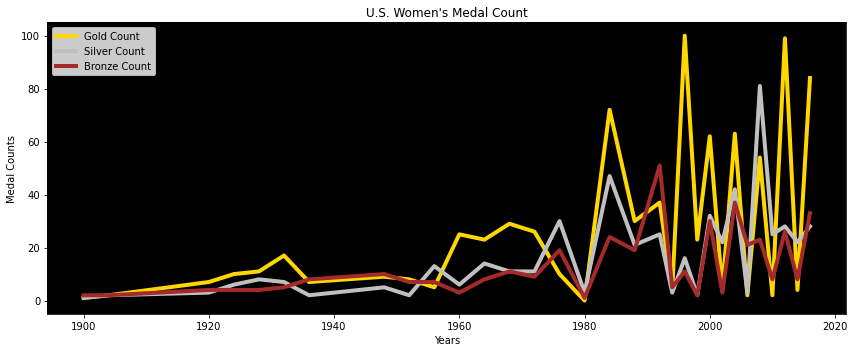

In [16]:
USWomen_Table = pd.DataFrame({"Gold Count":USWOMEN_GOLDEN,
                            "Silver Count":USWOMEN_SECOND,
                            "Bronze Count":USWOMEN_THIRD
})
Women_Us_Clean = USWomen_Table.replace(np.nan, 0)
Women_Us_Clean_2 = Women_Us_Clean.astype(int)
Women_Us_Clean_2.plot(style = {"Gold Count": 'gold', "Silver Count": 'silver', "Bronze Count":'brown'},figsize=(12,5), lw =4)
ax = plt.axes()
ax.set_facecolor("black")
plt.title("U.S. Women's Medal Count")
plt.xlabel("Years")
plt.ylabel("Medal Counts")
plt.tight_layout()
plt.savefig("Visualizations/U.S. Women's Medal Count.png")

In [19]:
USMW = USMale_Winner[["Year", "Medal"]]
USMMC = USMW.groupby(['Year','Medal']).agg(Medal_Count=pd.NamedAgg(column="Medal",aggfunc ="count"))
USMensMedalBRK = USMMC.reset_index()
USMensBREAK = USMensMedalBRK.set_index('Year')

USMWGold = USMensBREAK[(USMensBREAK["Medal"]=="Gold")]
USMALGOLD = USMWGold.drop(columns=["Medal"])
USMALGOLD.reset_index()
USMEN_GOLDEN = USMALGOLD["Medal_Count"]

USMWSilver = USMensBREAK[(USMensBREAK["Medal"]=="Silver")]
USMALSILVER = USMWSilver.drop(columns=["Medal"])
USMALSILVER.reset_index()
USMEN_SILVER = USMALSILVER["Medal_Count"]

USMWBronze = USMensBREAK[(USMensBREAK["Medal"]=="Bronze")]
USMALBRONZE = USMWBronze.drop(columns=["Medal"])
USMALBRONZE.reset_index()
USMEN_BRONZE = USMALBRONZE["Medal_Count"]

c:\users\bck2l\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


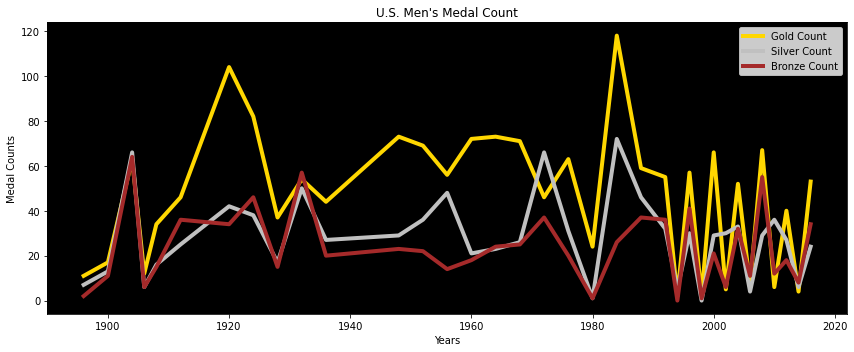

In [20]:
USMen_Table = pd.DataFrame({"Gold Count":USMEN_GOLDEN,
                            "Silver Count":USMEN_SILVER,
                            "Bronze Count":USMEN_BRONZE
})
Men_Us_Clean = USMen_Table.replace(np.nan, 0)
Men_Us_Clean_2 = Men_Us_Clean.astype(int)
Men_Us_Clean_2.plot(style = {"Gold Count": 'gold', "Silver Count": 'silver', "Bronze Count":'brown'},figsize=(12,5), lw =4)
ax = plt.axes()
ax.set_facecolor("black")
plt.title("U.S. Men's Medal Count")
plt.xlabel("Years")
plt.ylabel("Medal Counts")
plt.tight_layout()
plt.savefig("Visualizations/U.S. Men's Medal Count.png")

In [21]:
RUSmedal_winners = medals_winners_df[(medals_winners_df["Team"] == "Russia")]
RUSMale_Winner = RUSmedal_winners.loc[RUSmedal_winners["Sex"] == "M",:]
RUSFemale_Winner = RUSmedal_winners.loc[RUSmedal_winners["Sex"] == "F",:]

In [22]:
RUSFW = RUSFemale_Winner[["Year", "Medal"]]
RUSFMC = RUSFW.groupby(['Year','Medal']).agg(Medal_Count=pd.NamedAgg(column="Medal",aggfunc ="count"))
RUSWMedalBRK = RUSFMC.reset_index()
RUSBREAKW = RUSWMedalBRK.set_index('Year')

RUSFWGold = RUSBREAKW[(RUSBREAKW["Medal"]=="Gold")]
RUSFEMGOLD = RUSFWGold.drop(columns=["Medal"])
RUSFEMGOLD.reset_index()
RUSWOMEN_GOLDEN = RUSFEMGOLD["Medal_Count"]

RUSFWSilver = RUSBREAKW[(RUSBREAKW["Medal"]=="Silver")]
RUSFEMSILVER = RUSFWSilver.drop(columns=["Medal"])
RUSFEMSILVER.reset_index()
RUSWOMEN_SILVER = RUSFEMSILVER["Medal_Count"]

RUSFWBronze = RUSBREAKW[(RUSBREAKW["Medal"]=="Bronze")]
RUSFEMBRONZE = RUSFWBronze.drop(columns=["Medal"])
RUSFEMBRONZE.reset_index()
RUSWOMEN_THIRD = RUSFEMBRONZE["Medal_Count"]

c:\users\bck2l\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


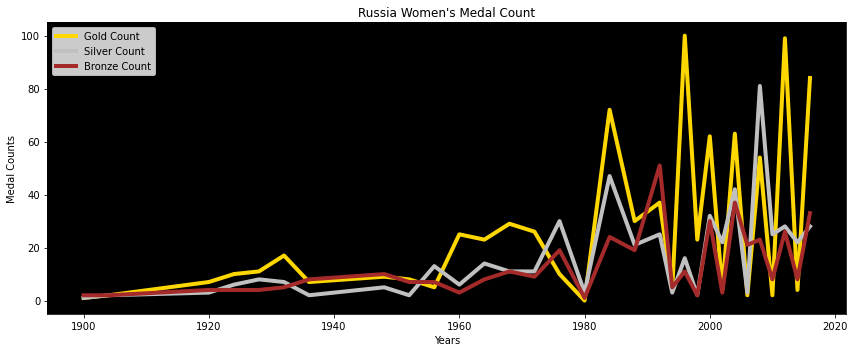

In [23]:
RUSWomen_Table = pd.DataFrame({"Gold Count":RUSWOMEN_GOLDEN,
                            "Silver Count":RUSWOMEN_SILVER,
                            "Bronze Count":RUSWOMEN_THIRD
})
Women_RUs_Clean = RUSWomen_Table.replace(np.nan, 0)
Women_RUs_Clean_2 = Women_Us_Clean.astype(int)
Women_RUs_Clean_2.plot(style = {"Gold Count": 'gold', "Silver Count": 'silver', "Bronze Count":'brown'},figsize=(12,5), lw =4)
ax = plt.axes()
ax.set_facecolor("black")
plt.title("Russia Women's Medal Count")
plt.xlabel("Years")
plt.ylabel("Medal Counts")
plt.tight_layout()
plt.savefig("Visualizations/Russia Women's Medal Count.png")

In [24]:
JPNmedal_winners = medals_winners_df[(medals_winners_df["Team"] == "Japan")]
JPNMale_Winner = JPNmedal_winners.loc[JPNmedal_winners["Sex"] == "M",:]
JPNFemale_Winner = JPNmedal_winners.loc[JPNmedal_winners["Sex"] == "F",:]

In [25]:
JPNFW = JPNFemale_Winner[["Year", "Medal"]]
JPNFMC = JPNFW.groupby(['Year','Medal']).agg(Medal_Count=pd.NamedAgg(column="Medal",aggfunc ="count"))
JPNWMedalBRK = JPNFMC.reset_index()
JPNBREAKW = JPNWMedalBRK.set_index('Year')

JPNFWGold = JPNBREAKW[(JPNBREAKW["Medal"]=="Gold")]
JPNFEMGOLD = JPNFWGold.drop(columns=["Medal"])
JPNFEMGOLD.reset_index()
JPNWOMEN_GOLDEN = JPNFEMGOLD["Medal_Count"]

JPNFWSilver = JPNBREAKW[(JPNBREAKW["Medal"]=="Silver")]
JPNFEMSILVER = JPNFWSilver.drop(columns=["Medal"])
JPNFEMSILVER.reset_index()
JPNWOMEN_SILVER = JPNFEMSILVER["Medal_Count"]

JPNFWBronze = JPNBREAKW[(JPNBREAKW["Medal"]=="Bronze")]
JPNFEMBRONZE = JPNFWBronze.drop(columns=["Medal"])
JPNFEMBRONZE.reset_index()
JPNWOMEN_THIRD = JPNFEMBRONZE["Medal_Count"]

c:\users\bck2l\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


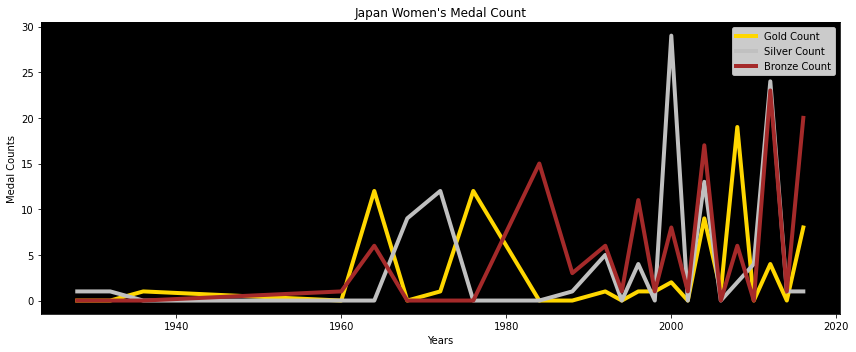

In [26]:
JPNWomen_Table = pd.DataFrame({"Gold Count":JPNWOMEN_GOLDEN,
                            "Silver Count":JPNWOMEN_SILVER,
                            "Bronze Count":JPNWOMEN_THIRD
})
Women_JPN_Clean = JPNWomen_Table.replace(np.nan, 0)
Women_JPN_Clean_2 = Women_JPN_Clean.astype(int)
Women_JPN_Clean_2.plot(style = {"Gold Count": 'gold', "Silver Count": 'silver', "Bronze Count":'brown'},figsize=(12,5), lw =4)
ax = plt.axes()
ax.set_facecolor("black")
plt.title("Japan Women's Medal Count")
plt.xlabel("Years")
plt.ylabel("Medal Counts")
plt.tight_layout()
plt.savefig("Visualizations/Japan Women's Medal Count.png")

In [27]:
CNmedal_winners = medals_winners_df[(medals_winners_df["Team"] == "China")]
CNMale_Winner = CNmedal_winners.loc[CNmedal_winners["Sex"] == "M",:]
CNFemale_Winner = CNmedal_winners.loc[CNmedal_winners["Sex"] == "F",:]

In [28]:
CNFW = CNFemale_Winner[["Year", "Medal"]]
CNFMC = CNFW.groupby(['Year','Medal']).agg(Medal_Count=pd.NamedAgg(column="Medal",aggfunc ="count"))
CNWMedalBRK = CNFMC.reset_index()
CNBREAKW = CNWMedalBRK.set_index('Year')

CNFWGold = CNBREAKW[(CNBREAKW["Medal"]=="Gold")]
CNFEMGOLD = CNFWGold.drop(columns=["Medal"])
CNFEMGOLD.reset_index()
CNWOMEN_GOLDEN = CNFEMGOLD["Medal_Count"]

CNFWSilver = CNBREAKW[(CNBREAKW["Medal"]=="Silver")]
CNFEMSILVER = CNFWSilver.drop(columns=["Medal"])
CNFEMSILVER.reset_index()
CNWOMEN_SILVER = CNFEMSILVER["Medal_Count"]

CNFWBronze = CNBREAKW[(CNBREAKW["Medal"]=="Bronze")]
CNFEMBRONZE = CNFWBronze.drop(columns=["Medal"])
CNFEMBRONZE.reset_index()
CNWOMEN_THIRD = CNFEMBRONZE["Medal_Count"]

c:\users\bck2l\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


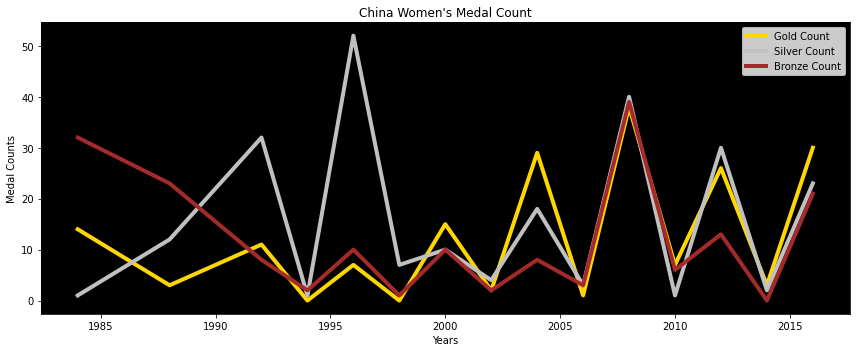

In [29]:
CNWomen_Table = pd.DataFrame({"Gold Count":CNWOMEN_GOLDEN,
                            "Silver Count":CNWOMEN_SILVER,
                            "Bronze Count":CNWOMEN_THIRD
})
Women_CN_Clean = CNWomen_Table.replace(np.nan, 0)
Women_CN_Clean_2 = Women_CN_Clean.astype(int)
Women_CN_Clean_2.plot(style = {"Gold Count": 'gold', "Silver Count": 'silver', "Bronze Count":'brown'},figsize=(12,5), lw =4)
ax = plt.axes()
ax.set_facecolor("black")
plt.title("China Women's Medal Count")
plt.xlabel("Years")
plt.ylabel("Medal Counts")
plt.tight_layout()
plt.savefig("Visualizations/China Women's Medal Count.png")